In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=949ccb11ae63d77fa2e2aed5406ab4c8d8ef09bb37527846c2fcdb06b456b82f
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a


In [ ]:
!pip install pytrends 
!pip install psutil requests
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import re
from datetime import datetime
import time
from scipy.stats import spearmanr
import plotly.express as px
from scipy import stats
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools as tls
import plotly.graph_objs as go
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from nltk import tokenize
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim import models
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
from google.colab import drive
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=5f5f2daa87599a4a97a281106aeb8b9655d8dc43e230068143c5482a266c277c
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working

/usr/local/lib/python3.8/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df_mev = pd.read_csv('/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yihang_Zesen_Research/Replicated data/mev1010.csv').drop(["Unnamed: 0"], axis =1)
df_mev
df_mev['Date']

0        2022-09-30 20:48:24+00:00
1        2022-09-30 20:47:32+00:00
2        2022-09-30 20:46:41+00:00
3        2022-09-30 18:02:14+00:00
4        2022-09-30 17:20:42+00:00
                   ...            
21233    2019-01-01 16:45:06+00:00
21234    2019-01-01 12:40:05+00:00
21235    2019-01-01 10:15:09+00:00
21236    2019-01-01 09:15:05+00:00
21237    2019-01-01 09:00:04+00:00
Name: Date, Length: 21238, dtype: object

In [30]:
df_flashbots = pd.read_csv('/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yihang_Zesen_Research/Replicated data/flashbots1010.csv').drop(["Unnamed: 0"], axis =1)
df_flashbots
df_flashbots['Date']

0      2022-09-30 21:05:08+00:00
1      2022-09-30 13:06:33+00:00
2      2022-09-30 10:56:26+00:00
3      2022-09-30 08:45:35+00:00
4      2022-09-30 06:55:41+00:00
                 ...            
875    2019-01-26 15:02:47+00:00
876    2019-01-26 14:12:20+00:00
877    2019-01-26 13:52:52+00:00
878    2019-01-26 01:07:09+00:00
879    2019-01-25 17:30:25+00:00
Name: Date, Length: 880, dtype: object

## Data cleaning

1) Remove punctuation 

2) Convert the titles to lowercase 

In [31]:
def clean_data(df):
  df['paper_text_processed'] = \
  df['Tweets'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
  df['paper_text_processed'] = \
  df['paper_text_processed'].map(lambda x: x.lower())
  return df

<>:3: DeprecationWarning:

invalid escape sequence \.

<>:3: DeprecationWarning:

invalid escape sequence \.

<ipython-input-31-8410d0ea730d>:3: DeprecationWarning:

invalid escape sequence \.



In [32]:
df_mev2=clean_data(df_mev)
df_flashbots=clean_data(df_flashbots)

## Time series

###Average Tweet Length & Volume


1) Calculate Tweet Volume by date

2) Calculate Average Tweet Length by Date

In [33]:
def ts_tweet(df):
  df['len'] = df['paper_text_processed'].str.split().str.len()
  df["Date"]=pd.to_datetime(df["Date"],errors='coerce',utc=True)
  df["day"]=df["Date"].dt.date
  c=pd.DataFrame({'Tweet Counts' : df.groupby(by=["day"])["Tweets"].count()}).reset_index()
  tweet_volume=c["Tweet Counts"].values.tolist()
  a=pd.DataFrame({'Tweet Length' : df.groupby(by=["day"])["len"].mean()}).reset_index()
  tweet_len=a["Tweet Length"].values.tolist()
  return tweet_len, tweet_volume, df

For mev

In [34]:
tweet_len_mev2, tweet_volume_mev2, df_mev = ts_tweet(df_mev2)[0], ts_tweet(df_mev2)[1], ts_tweet(df_mev2)[2]
del tweet_len_mev2[0:2]
del tweet_volume_mev2[0:2]

In [ ]:
tweet_volume_mev2 #1303 items

For flashbots

In [36]:
tweet_len_flashbots, tweet_volume_flashbots, df_flashbots = ts_tweet(df_flashbots)[0], ts_tweet(df_flashbots)[1], ts_tweet(df_flashbots)[2]
del tweet_len_flashbots[0:2]
del tweet_volume_flashbots[0:2]

In [ ]:
tweet_volume_flashbots #401 items

##Google Trend

In [38]:
from pytrends.request import TrendReq
from pytrends import dailydata

In [ ]:
dftrendmev = dailydata.get_daily_data('mev', 2019, 1, 2022, 10)

For MEV google trend

In [20]:
dftrendmev = pd.read_csv("/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yihang_Zesen_Research/Replicated data/trend_mev.csv")

In [21]:
print(dftrendmev)

            date  mev_unscaled  mev_monthly isPartial  scale    mev
0     2019-01-01            30          NaN       NaN    NaN    NaN
1     2019-01-02            29          NaN       NaN    NaN    NaN
2     2019-01-03            25          NaN       NaN    NaN    NaN
3     2019-01-04            48          NaN       NaN    NaN    NaN
4     2019-01-05           100          NaN       NaN    NaN    NaN
...          ...           ...          ...       ...    ...    ...
1383  2022-10-15            45         64.0       NaN   0.64  28.80
1384  2022-10-16            38         54.0      True   0.54  20.52
1385  2022-10-17            51         54.0       NaN   0.54  27.54
1386  2022-10-18            58         54.0       NaN   0.54  31.32
1387  2022-10-19            66         54.0       NaN   0.54  35.64

[1388 rows x 6 columns]


In [43]:
f = dftrendmev.describe()
f

mev_unscaled  mev_monthly        scale          mev
count   1388.000000  1383.000000  1383.000000  1383.000000
mean      42.654899    50.006508     0.500065    22.397845
std       26.619724    13.883403     0.138834    16.650998
min        0.000000    11.000000     0.110000     0.000000
25%       25.000000    41.000000     0.410000    10.560000
50%       43.000000    48.000000     0.480000    20.400000
75%       60.000000    57.000000     0.570000    31.360000
max      100.000000   100.000000     1.000000    98.000000

For flashbots google trend


In [ ]:
dftrendflashbots = dailydata.get_daily_data('flashbots', 2019, 1, 2022, 10)

In [41]:
dftrendflashbots = pd.read_csv("/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yihang_Zesen_Research/Replicated data/trend_flashbots.csv")

In [45]:
e = dftrendflashbots.describe()
e

flashbots_unscaled  flashbots_monthly        scale    flashbots
count         1388.000000        1383.000000  1383.000000  1383.000000
mean            12.087176           9.672451     0.096725     1.208756
std             26.701107          14.488746     0.144887     4.537407
min              0.000000           0.000000     0.000000     0.000000
25%              0.000000           0.000000     0.000000     0.000000
50%              0.000000           0.000000     0.000000     0.000000
75%              0.000000          18.000000     0.180000     0.000000
max            100.000000         100.000000     1.000000    48.500000

Relation between MEV twitter volume and google trend

(1004.0, 1033.0)

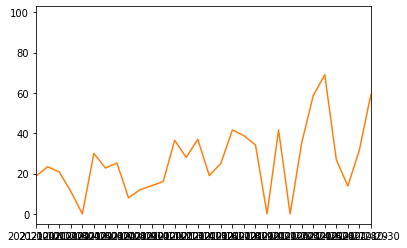

In [ ]:
plt.plot(df_trend_mev2['date'],df_trend_mev2['tweet_volume'])
plt.plot(dftrendmev['date'],dftrendmev['mev'])
plt.xlim(['2021-10-01','2021-10-30'])

Relation between MEV google trend and flashbots google trend

(790.0, 1094.0)

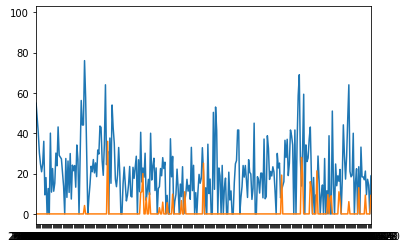

In [ ]:
plt.plot(dftrendconcat['date'], dftrendconcat['mev'], label = "line 1")
plt.plot(dftrendconcat['date'], dftrendconcat['flashbots'], label = "line 2")
plt.xlim(['2021-03-01','2021-12-30'])

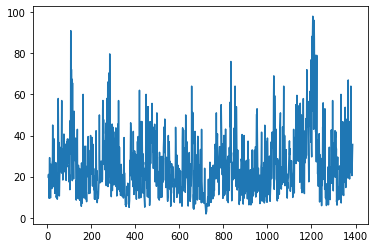

In [ ]:
dftrendmev['mev'][dftrendmev['mev']>0].plot.line()

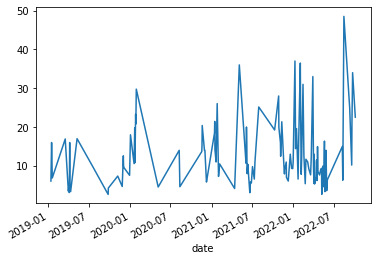

In [ ]:
dftrendflashbots['flashbots'][dftrendflashbots['flashbots']>0].plot.line()

##Spearman Correlation test

In [ ]:
dftrendconcat= pd.concat ([dftrendmev, dftrendflashbots])


In [ ]:
def spearman_corr(df_trends,names):
  coef, p = spearmanr(dftrendconcat["mev"], dftrendconcat["flashbots"])
  print(names)
  print('Spearmans correlation coefficient: %.3f' % coef)
  print('P-value: %.3f' % p)

For mev tag

In [ ]:
spearman_corr(dftrendconcat,"mev")

mev
Spearmans correlation coefficient: nan
P-value: nan


For tag flahsbots

In [ ]:
spearman_corr(df_trend_flashbots,"flashbot")

flashbot
Spearmans correlation coefficient: -0.079
P-value: 0.350


In [ ]:
trace1 = go.Scatter(x=df_mev2["day"], y=ts_tweet(df_mev2)[1], name=" #mev")
trace2 = go.Scatter(x=df_flashbots["day"], y=ts_tweet(df_flashbots)[1], name=" #flashbots")
trace3 = go.Scatter(x=df_mev2["day"], y=[21.86]*len(df_mev2["day"]), name="Mean",line=dict(color='blue', width=4,
                    dash='dash'))
trace4 = go.Scatter(x=df_flashbots["day"], y=[25.1]*len(df_flashbots["day"]), name="Mean",line=dict(color='firebrick', width=4,
                    dash='dash'))

fig = make_subplots(rows=2, cols=1,
                        print_grid=True,
                        horizontal_spacing=0.5,
                        vertical_spacing=0.3, subplot_titles=("for #mev2","for #flashbots")
                         )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 2, 1)

#fig.update_layout(trace1 = dict(range=[<from_value>, <to_value>]))
# Set x-axis title
fig.update_xaxes(title_text="Date",tickfont_size=13,)
fig.update_layout(xaxis1 = dict(range=["2019-01-01","2022-10-1"]))

# Set y-axes titles
fig.update_yaxes(title_text="No. of Words per Tweet", tickfont_size=13, secondary_y=False,range=[15,35])

##Plot Google Trend & Tweet Volume

In [ ]:
def figure_volume(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.show()

In [ ]:
figure_volume(dftrendmev,"mev")

KeyError: ignored

In [ ]:
figure_volume(df_trend_flashbots,"#flashbot")

In [ ]:
def figure_volume_2(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.add_shape(type="line", x0=datetime.datetime(2021, 1, 1), y0=1, x1=datetime.datetime(2021, 3, 14), y1=1,line=dict(color="White",width=2.5,))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2020, 10, 1),datetime.datetime(2020, 12, 1) ], y=[100000, 100000],name = "Time Series for BLM",
    text=["Time Series for #mev",],mode="text",))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2021, 8, 1),datetime.datetime(2021, 12, 1) ], y=[100000, 100000],name = "Time Series for SAH",
    text=["Time Series for #flashbot",],mode="text",))
  fig.show()

In [ ]:
figure_volume_2(df_trend_concat,"#mev and #flashbot")

##Overall frequency

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu',"u","e","i鈥檓",'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_mev2['tweet_without_stopwords'] = df_mev2["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))
df_flashbots['tweet_without_stopwords'] = df_flashbots["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))

In [ ]:
tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    dfFrequency=dfFrequency.reset_index().reset_index()
    return dfFrequency

In [ ]:
df1=counter(df_mev2, 'tweet_without_stopwords', 20)
df2=counter(df_flashbots, 'tweet_without_stopwords', 20)

###Plot the wordcount graph

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129302 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 9973 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 129302 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 9973 missing from current font.



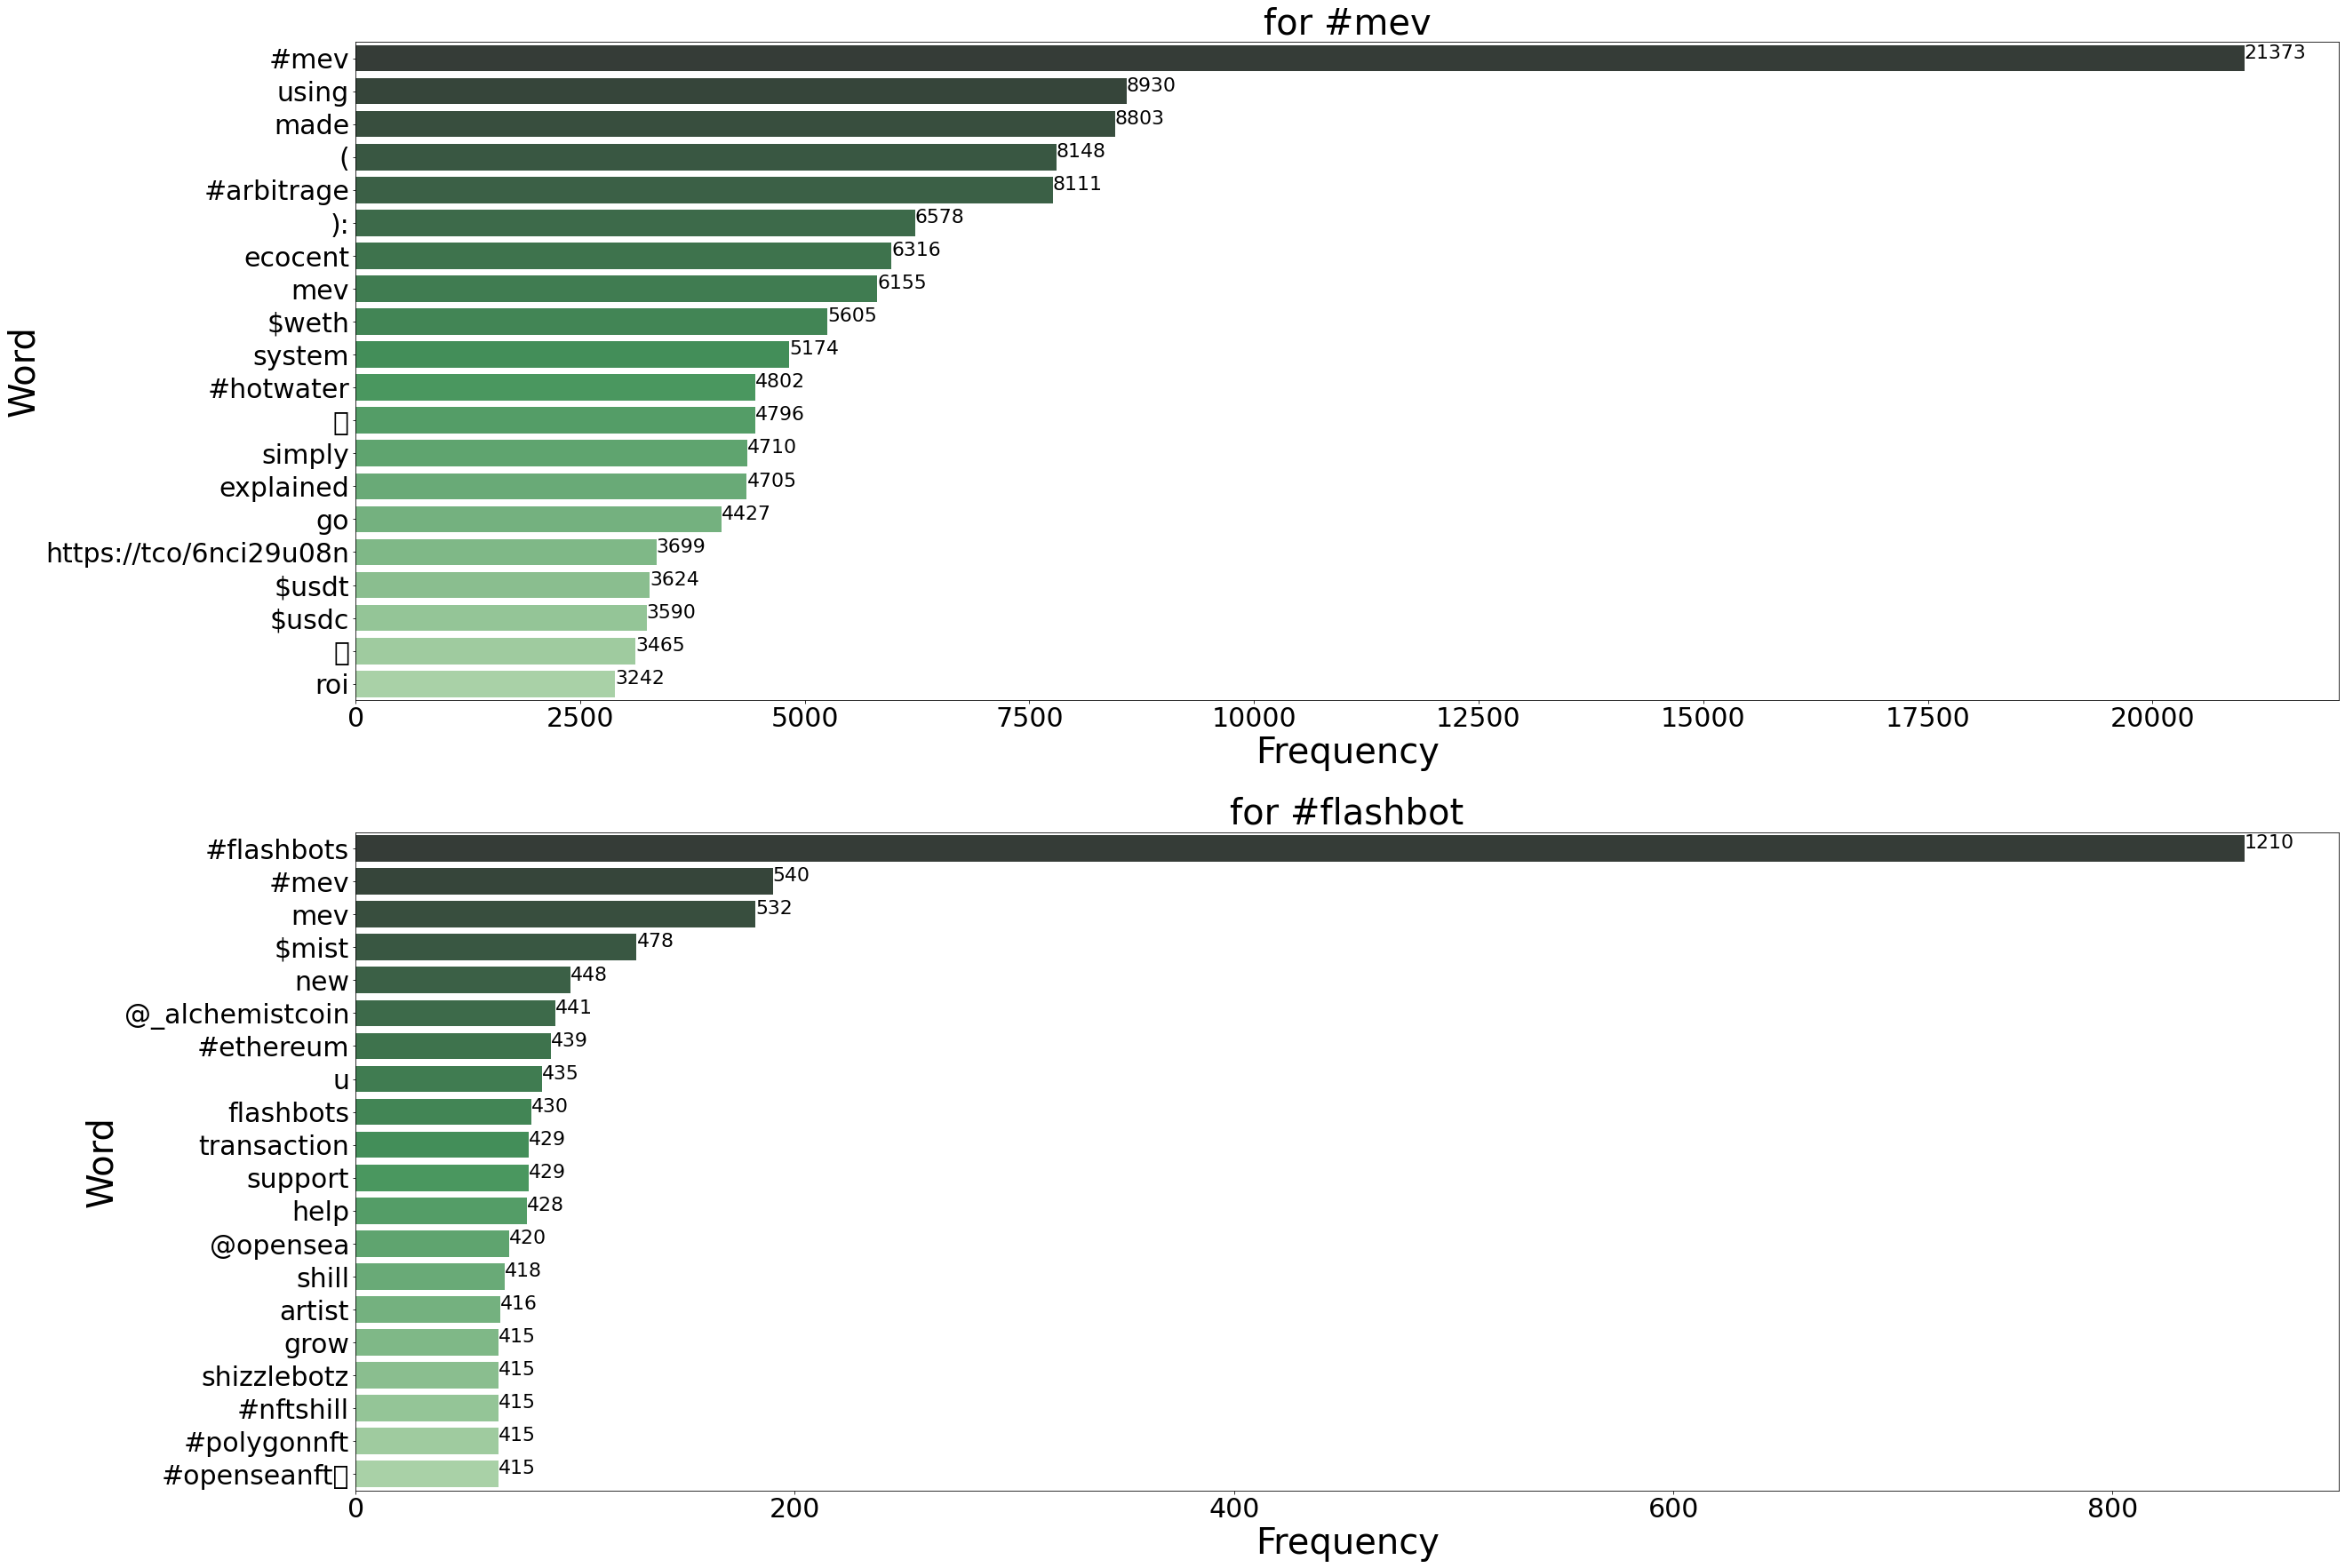

<Figure size 432x288 with 0 Axes>

In [ ]:
ig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #mev',fontsize=40)
axs[1].set_title('for #flashbot',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(df1["Frequency"]))
rank1 = df1["Frequency"].argsort().argsort()
ax1=sns.barplot(data =df1, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])

for index, row in df1.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(df2["Frequency"]))
rank2 = df2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =df2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank1], ax=axs[1])

for index, row in df2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()
plt.savefig('Wordcount1010')

##Word Cloud

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df_flashbots['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))

#nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

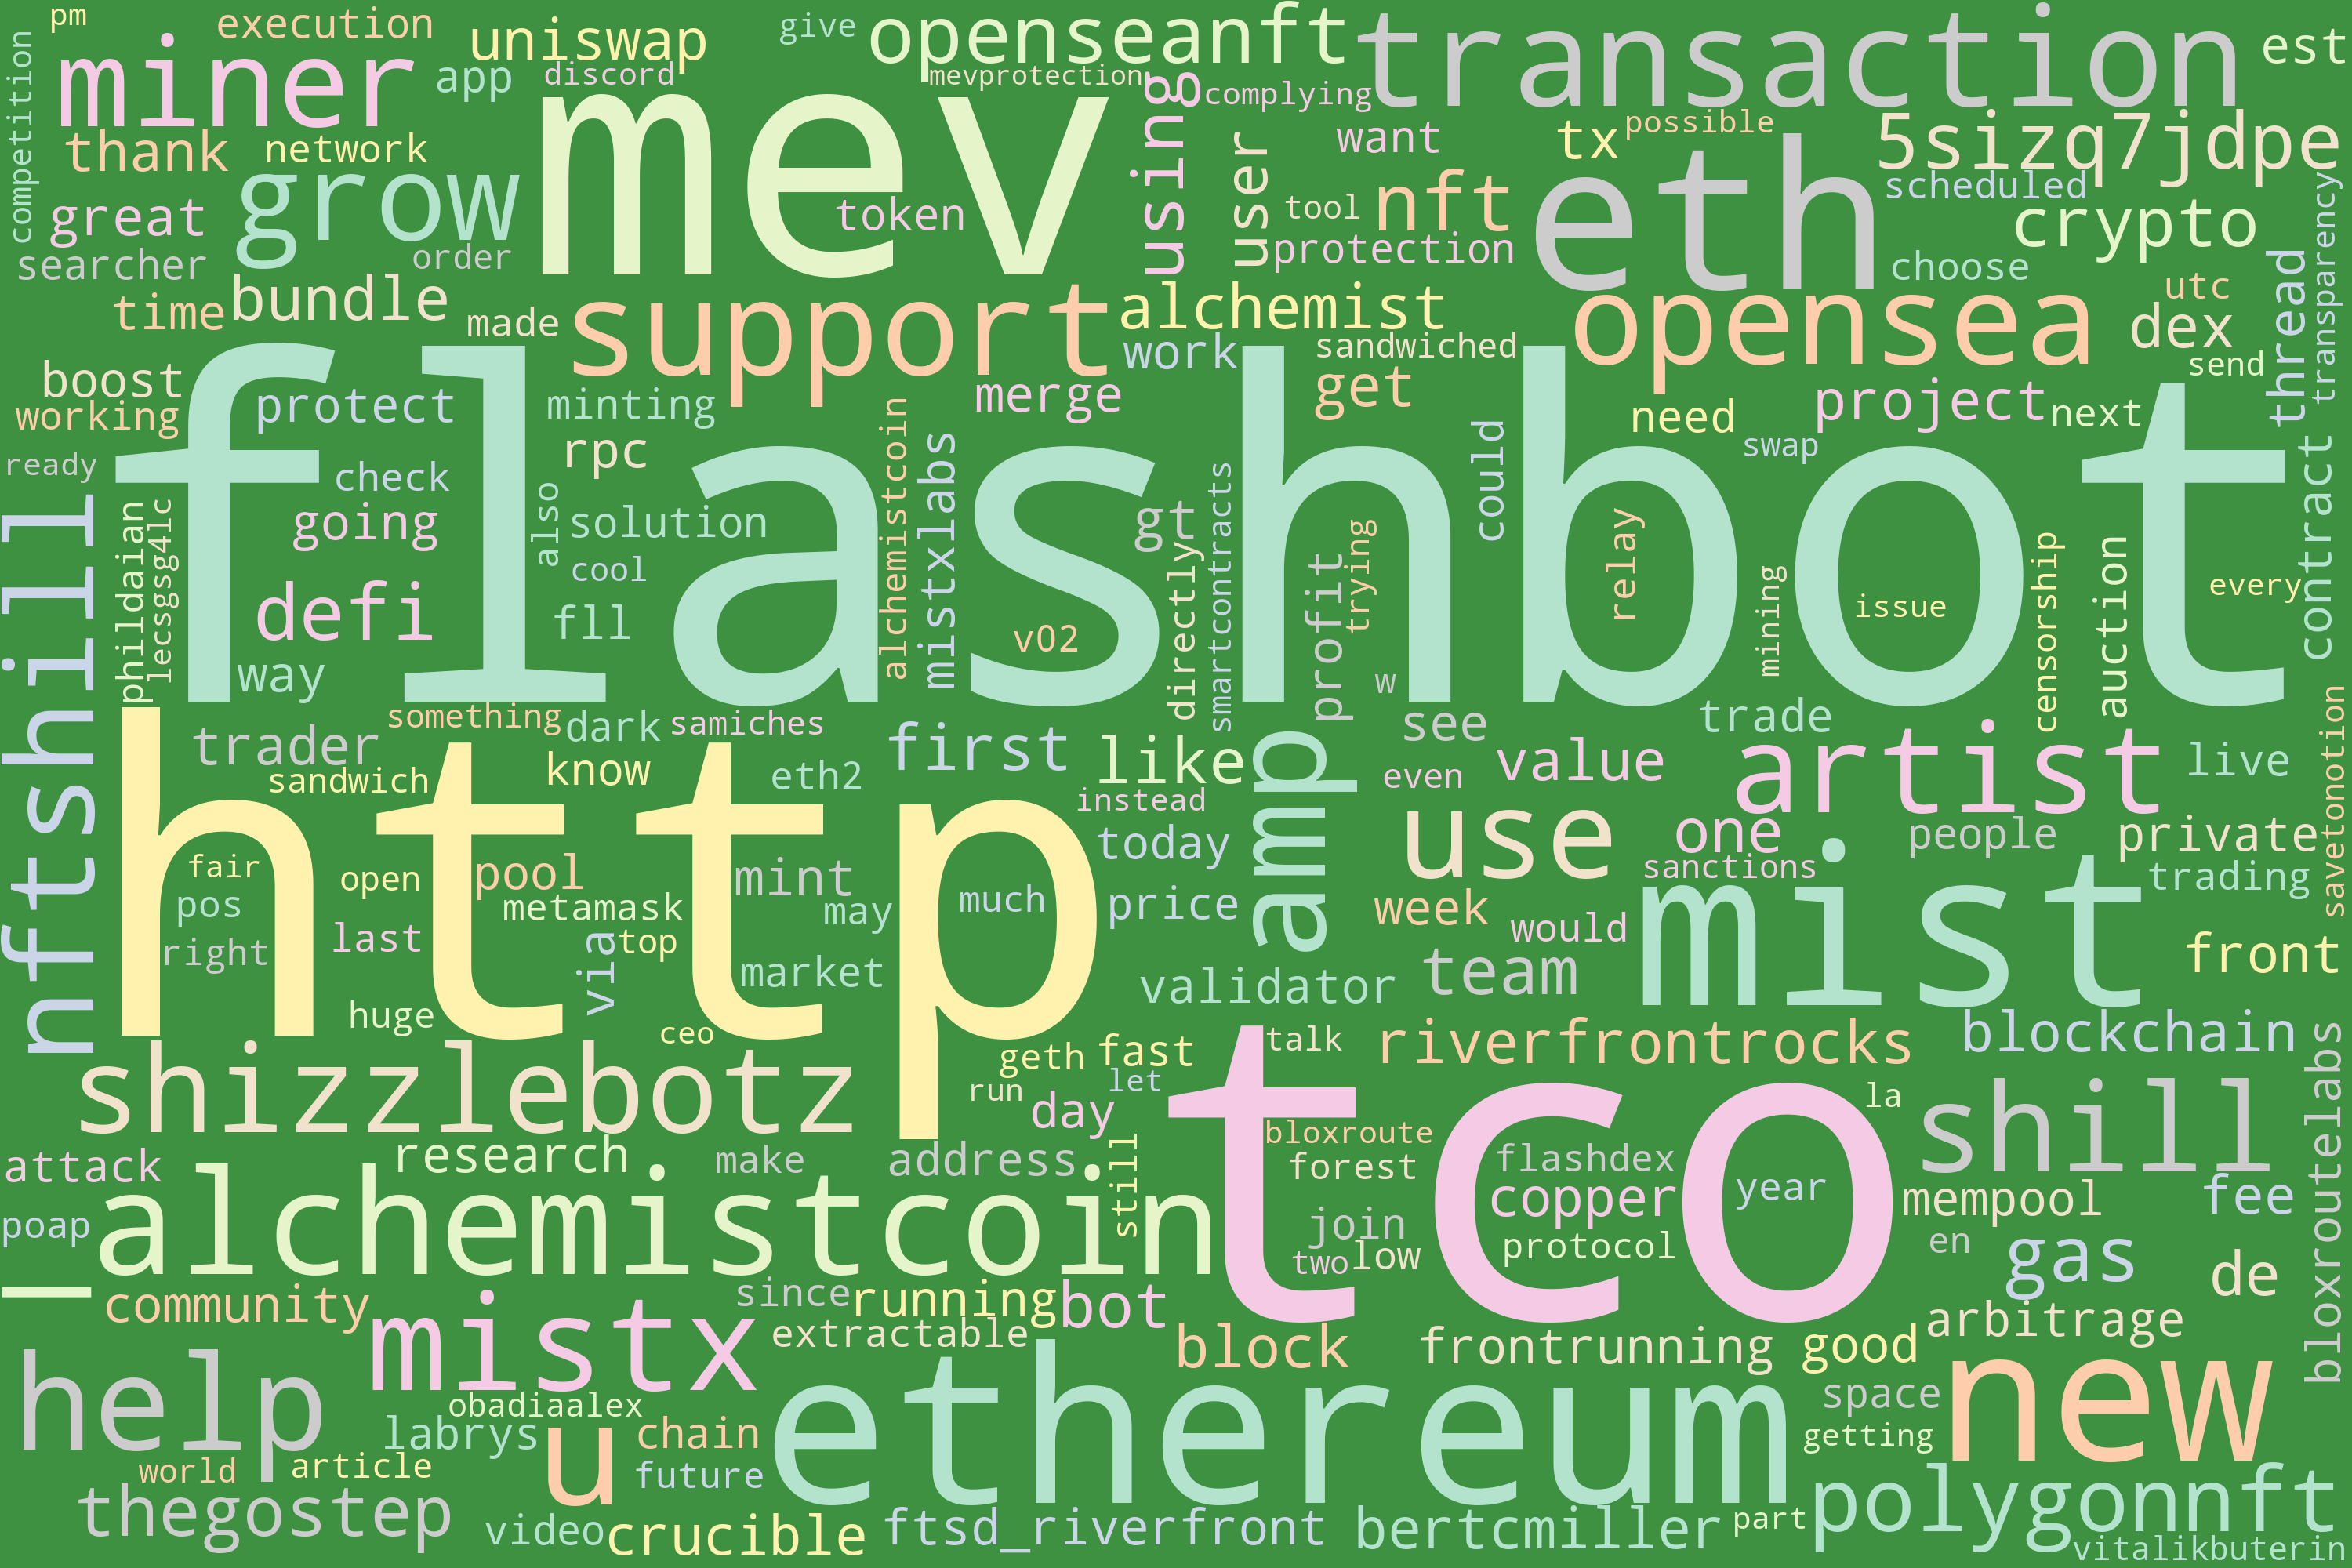

In [ ]:
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False).generate(long_string)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
long_string = ','.join(list(df_mev2['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


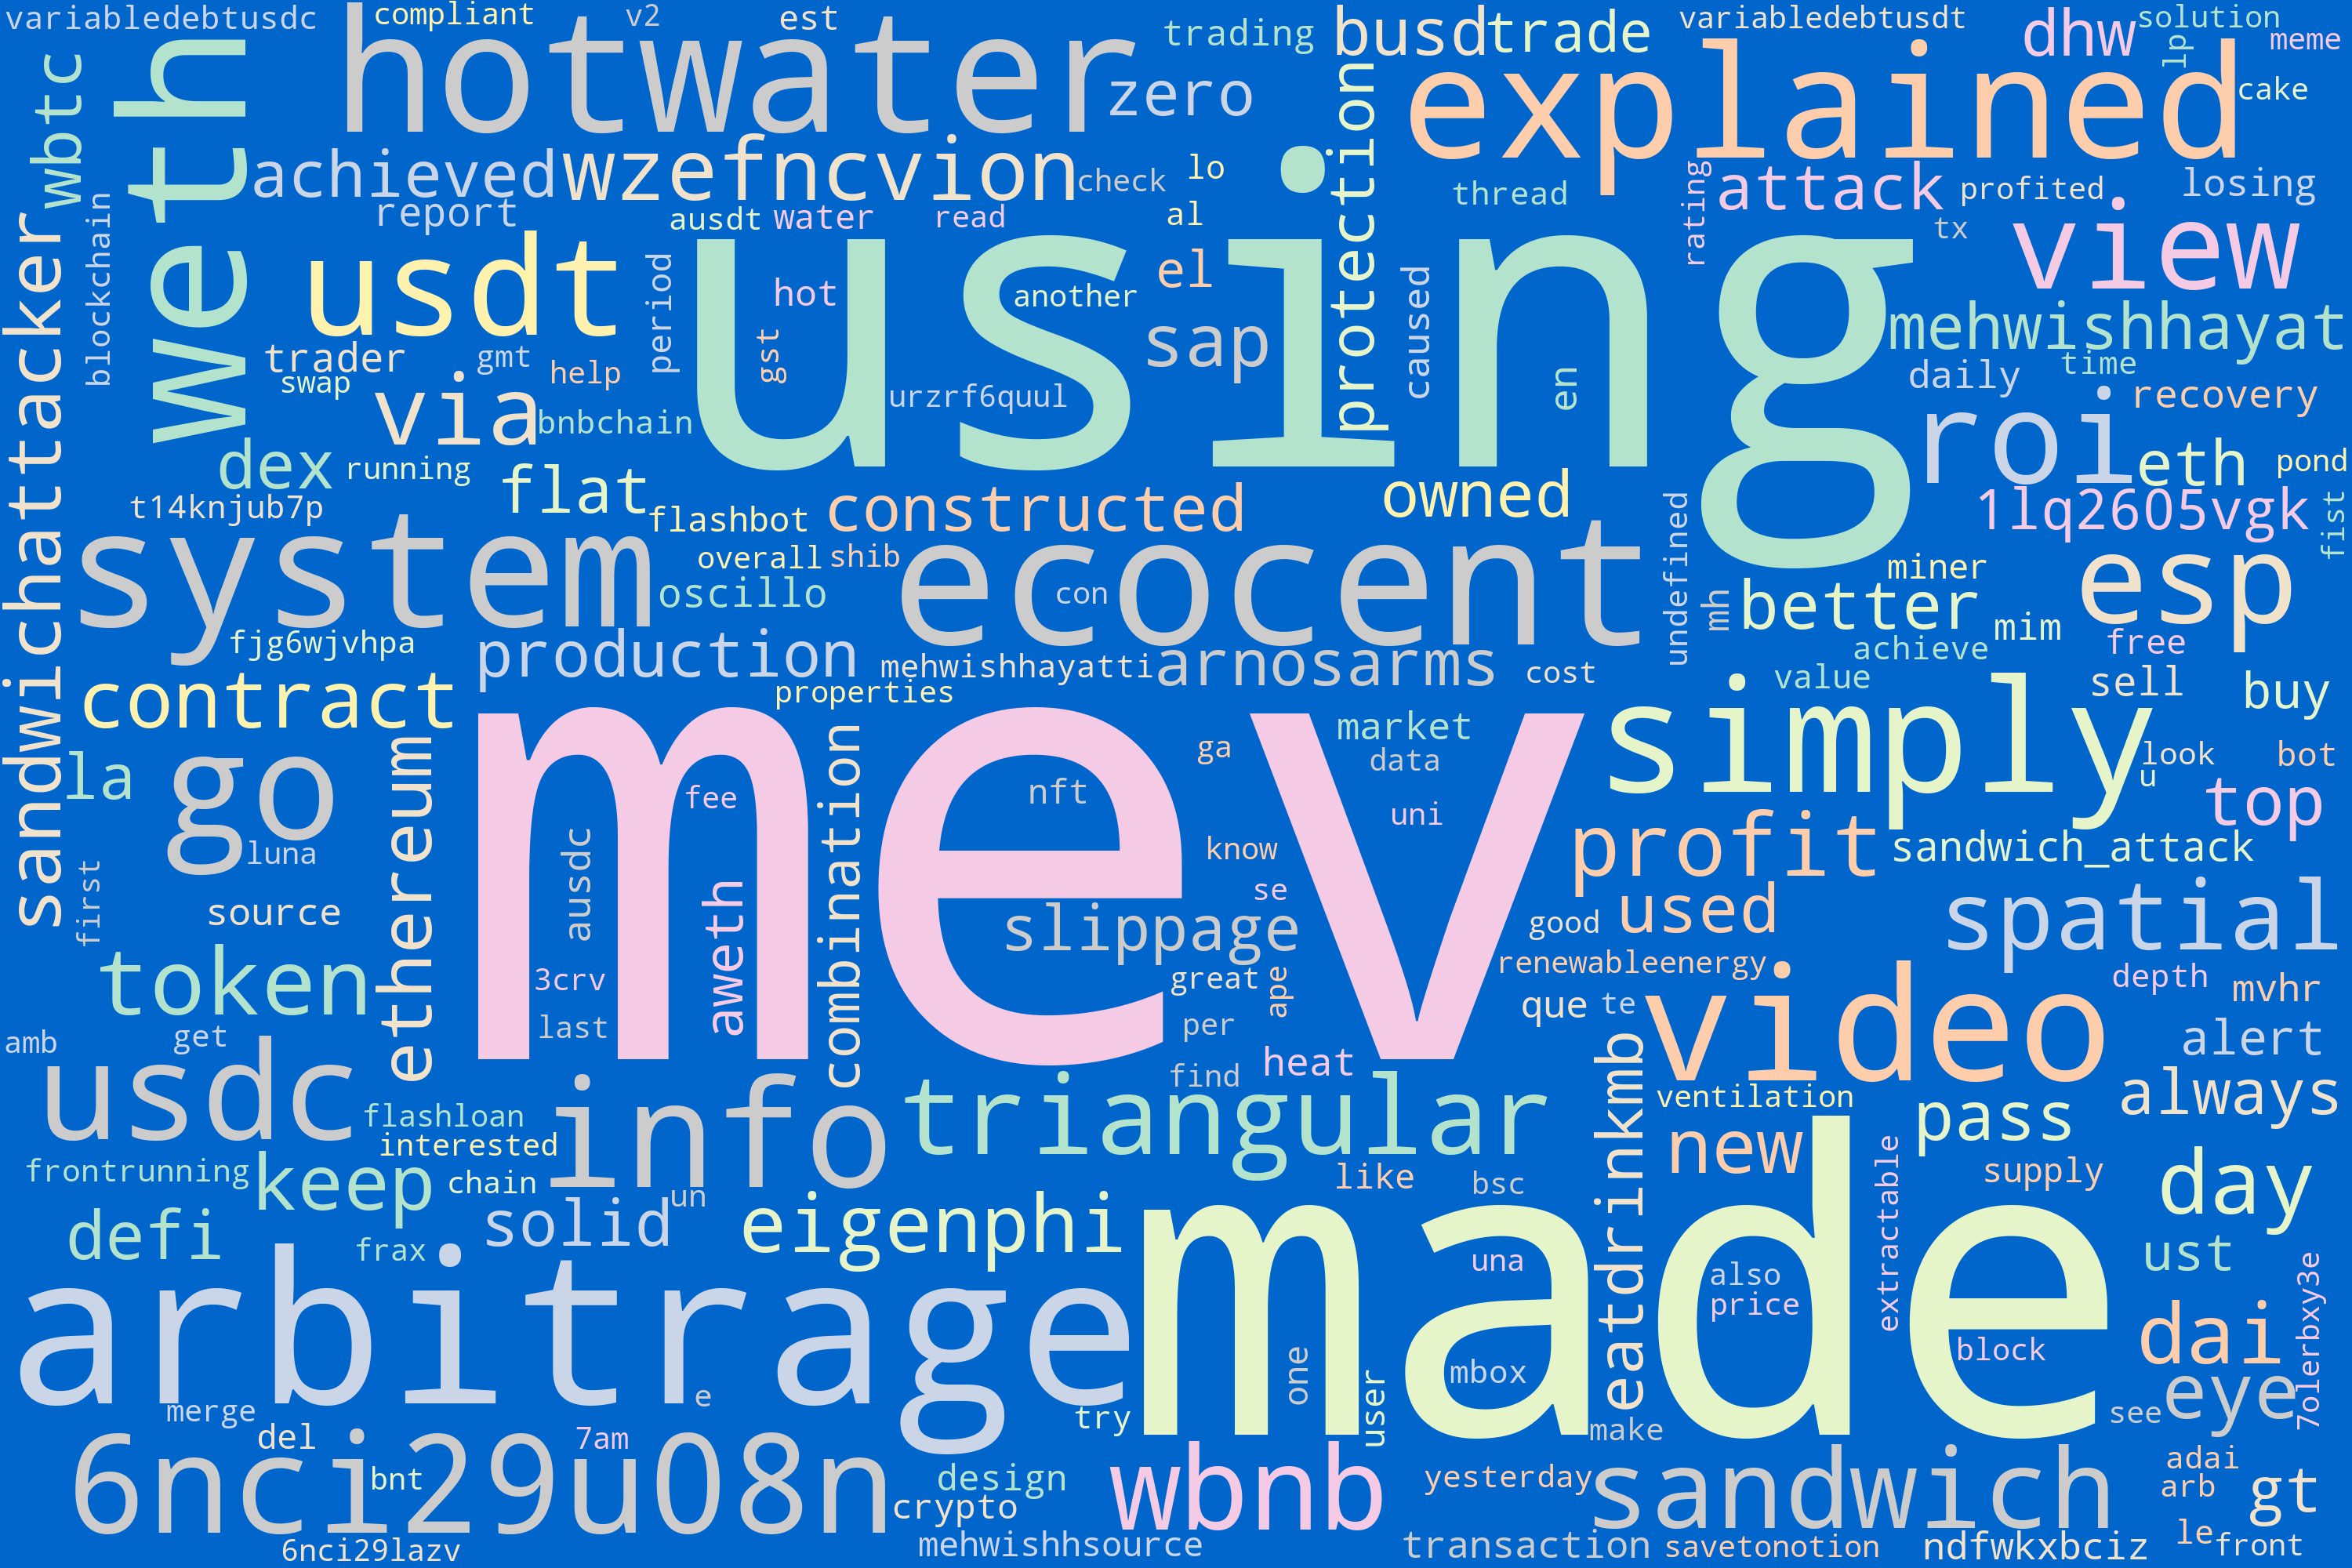

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

###LDA analysis for tag mev & flashbots

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_flashbots.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['flashbots', 'twitter', 'accounts', 'want', 'tag', 'couple', 'tweets', 'flashbots']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
def lda(corpus,id2word,num_topics):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics, random_state=100)
  # Print the Keyword 
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  return doc_lda

Topic is 1

In [ ]:
lda(corpus, id2word, 1)

In [ ]:
print(df_mev2['tweet_without_stopwords'])

0        🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...
1        🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...
2        🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...
3        🔴 visita el #mev aquest cap setmana aprofita l...
4        #mev 🤖 user made profit $79441 roi 44838% 7 da...
                               ...                        
21233    esp ecocent mev system simply explained video:...
21234    esp ecocent mev system simply explained video:...
21235    4 new flat constructed @arnosarms owned @eatdr...
21236    esp ecocent mev system simply explained video:...
21237    achieve compliant better sap rating ecocent #m...
Name: tweet_without_stopwords, Length: 21238, dtype: object


###When is 5

In [ ]:
from pprint import pprint

# number of topics
num_topics =5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.061*"flashbots" + 0.031*"mev" + 0.014*"eth" + 0.013*"ethereum" + '
  '0.007*"mist" + 0.006*"mistx" + 0.004*"miners" + 0.003*"thread" + '
  '0.003*"using" + 0.003*"like"'),
 (1,
  '0.047*"flashbots" + 0.018*"mev" + 0.011*"mist" + 0.007*"mistx" + '
  '0.006*"eth" + 0.006*"gas" + 0.005*"alchemist" + 0.003*"pm" + '
  '0.003*"running" + 0.003*"dex"'),
 (2,
  '0.043*"flashbots" + 0.010*"eth" + 0.008*"mev" + 0.008*"mist" + '
  '0.005*"first" + 0.005*"labrys" + 0.004*"ethereum" + 0.004*"thegostep" + '
  '0.004*"defi" + 0.003*"mistxlabs"'),
 (3,
  '0.049*"flashbots" + 0.018*"mev" + 0.016*"new" + 0.014*"help" + '
  '0.014*"support" + 0.014*"us" + 0.014*"opensea" + 0.013*"polygonnft" + '
  '0.013*"artist" + 0.013*"openseanft"'),
 (4,
  '0.044*"flashbots" + 0.029*"mev" + 0.005*"gas" + 0.004*"gt" + 0.004*"mist" + '
  '0.003*"riverfrontrocks" + 0.003*"crypto" + 0.003*"ethereum" + 0.003*"eth" + '
  '0.003*"transactions"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.015083 -0.008630       1        1  29.251874
3      0.126628  0.003747       2        1  25.145364
1     -0.035937 -0.079248       3        1  16.500813
4     -0.028489  0.027463       4        1  14.907521
2     -0.047119  0.056669       5        1  14.194428, topic_info=              Term       Freq      Total Category  logprob  loglift
1378    polygonnft  50.000000  50.000000  Default  30.0000  30.0000
1377    openseanft  50.000000  50.000000  Default  29.0000  29.0000
1380   shizzlebotz  50.000000  50.000000  Default  28.0000  28.0000
1373          grow  50.000000  50.000000  Default  27.0000  27.0000
1375      nftshill  50.000000  50.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
123          great   4.501239  20.721331   Topic5  -6.1168   0.4255
168   transactions   4.691068  38.503827   Topic5  -6.0755  -0.1528
326          block   4.012337  17.134849   Topic5  -6.2318   0.5006
62          crypto   4.397055  33.776222   Topic5  -6.1402  -0.0865
49              us   4.650703  65.770179   Topic5  -6.0841  -0.6968

[367 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4551      5  0.692838   abwandern
792       2  0.886249      acerca
1163      1  0.395992     address
1163      2  0.527989     address
1163      3  0.065999     address
...     ...       ...         ...
818       4  0.463036     youtube
3027      4  0.706287  заработали
1606      3  0.904666          из
3031      4  0.952589          на
3037      4  0.952606  уязвимости

[696 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])

###When is 10

In [ ]:
from pprint import pprint

# number of topics
num_topics =10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.060*"flashbots" + 0.027*"mev" + 0.013*"ethereum" + 0.011*"eth" + '
  '0.007*"mist" + 0.005*"mistx" + 0.004*"using" + 0.004*"miners" + '
  '0.004*"nfts" + 0.004*"team"'),
 (1,
  '0.051*"flashbots" + 0.017*"mev" + 0.015*"mist" + 0.006*"mistx" + '
  '0.006*"gas" + 0.005*"alchemist" + 0.004*"eth" + 0.004*"pm" + 0.004*"dex" + '
  '0.003*"team"'),
 (2,
  '0.046*"flashbots" + 0.011*"eth" + 0.009*"mev" + 0.008*"mist" + '
  '0.005*"mistxlabs" + 0.005*"first" + 0.005*"defi" + 0.005*"dex" + '
  '0.004*"nft" + 0.004*"thegostep"'),
 (3,
  '0.046*"flashbots" + 0.021*"mev" + 0.012*"mist" + 0.008*"ethereum" + '
  '0.006*"defi" + 0.006*"transactions" + 0.005*"mistx" + 0.005*"est" + '
  '0.005*"using" + 0.004*"nft"'),
 (4,
  '0.045*"flashbots" + 0.025*"mev" + 0.010*"gt" + 0.006*"transactions" + '
  '0.005*"mist" + 0.004*"defi" + 0.004*"gas" + 0.004*"crypto" + 0.003*"value" '
  '+ 0.003*"riverfrontrocks"'),
 (5,
  '0.028*"flashbots" + 0.006*"ethereum" + 0.005*"mev" + 0.004*"mistx" + '
  '0.004*

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.036606 -0.111296       1        1  16.008644
5      0.061549  0.085522       2        1  15.306482
6      0.063890 -0.005053       3        1  14.205683
4      0.003981  0.116122       4        1  11.914524
8      0.046934 -0.023496       5        1  11.243952
0     -0.156765 -0.001030       6        1  10.392456
1      0.004546 -0.044432       7        1   7.884498
2     -0.056743  0.003971       8        1   6.379030
7     -0.011145 -0.010094       9        1   3.681840
9      0.007148 -0.010215      10        1   2.982891, topic_info=         Term       Freq      Total Category  logprob  loglift
176        gt   7.000000   7.000000  Default  30.0000  30.0000
827  paradigm   3.000000   3.000000  Default  29.0000  29.0000
343      poap   9.000000   9.000000  Default  28.0000  28.0000
5         new  12.000000  12.000000  Default  27.0000  27.0000
255      mist  45.000000  45.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
513     front   0.402371   4.182982  Topic10  -5.6939   1.1709
850     block   0.402370   5.150011  Topic10  -5.6939   0.9629
19    article   0.402373   5.158241  Topic10  -5.6939   0.9613
635   bundles   0.402370   7.787622  Topic10  -5.6939   0.5494
171      defi   0.402373  10.347346  Topic10  -5.6939   0.2652

[617 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
966       5  0.786364   aakohynkwd
519       6  0.783469          add
1880      5  0.786364     addition
2058      3  0.739977   additional
1417      8  0.870526  adjustments
...     ...       ...          ...
930       6  0.510089         year
1245      1  0.687741          yes
1245      4  0.229247          yes
400       1  0.909814          yet
1846      7  0.810577           zs

[811 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 5, 9, 1, 2, 3, 8, 10])

###When is 15

In [ ]:
from pprint import pprint

# number of topics
num_topics =15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.060*"flashbots" + 0.026*"mev" + 0.013*"ethereum" + 0.011*"eth" + '
  '0.009*"mist" + 0.006*"mistx" + 0.005*"community" + 0.004*"team" + '
  '0.004*"nfts" + 0.004*"defi"'),
 (1,
  '0.048*"flashbots" + 0.022*"mev" + 0.013*"mist" + 0.007*"mistx" + '
  '0.005*"running" + 0.004*"ethereum" + 0.004*"front" + 0.004*"gas" + '
  '0.004*"attacks" + 0.003*"bots"'),
 (2,
  '0.041*"flashbots" + 0.014*"eth" + 0.013*"mev" + 0.011*"first" + '
  '0.008*"defi" + 0.006*"dex" + 0.006*"moonke" + 0.006*"mist" + 0.005*"crypto" '
  '+ 0.005*"space"'),
 (3,
  '0.044*"flashbots" + 0.023*"mev" + 0.012*"mist" + 0.008*"ethereum" + '
  '0.006*"transactions" + 0.005*"crypto" + 0.005*"est" + 0.005*"defi" + '
  '0.004*"research" + 0.004*"front"'),
 (4,
  '0.051*"flashbots" + 0.027*"mev" + 0.010*"gt" + 0.006*"riverfrontrocks" + '
  '0.006*"eth" + 0.005*"ftsd_riverfront" + 0.005*"robot" + 0.005*"time" + '
  '0.005*"transactions" + 0.004*"via"'),
 (5,
  '0.024*"flashbots" + 0.006*"ethereum" + 0.005*"mev" + 0.005

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.184137 -0.004324       1        1  13.967668
7      0.041612  0.110370       2        1  12.027805
0      0.012324  0.069862       3        1   9.238057
13     0.059251  0.081050       4        1   8.578354
3      0.015261  0.031123       5        1   7.789556
10    -0.092848  0.004877       6        1   7.205214
14    -0.103115 -0.022249       7        1   6.123778
8     -0.096013 -0.007557       8        1   6.082783
4      0.021957  0.005583       9        1   5.230109
6      0.060939 -0.020326      10        1   5.159472
2      0.050680 -0.020440      11        1   4.752806
12     0.051475 -0.055859      12        1   4.688585
1      0.057544 -0.022365      13        1   4.103615
9      0.048226 -0.084988      14        1   2.622795
5      0.056844 -0.064758      15        1   2.429403, topic_info=             Term       Freq      Total Category  logprob  loglift
1375     nftshill  54.000000  54.000000  Default  30.0000  30.0000
1378   polygonnft  54.000000  54.000000  Default  29.0000  29.0000
1380  shizzlebotz  54.000000  54.000000  Default  28.0000  28.0000
1377   openseanft  54.000000  54.000000  Default  27.0000  27.0000
1373         grow  54.000000  54.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
589          week   0.782610  13.717445  Topic15  -6.1011   0.8537
872         value   0.795397  21.790721  Topic15  -6.0848   0.4071
497     thegostep   0.683164  38.211178  Topic15  -6.2370  -0.3066
484   bertcmiller   0.651864  24.192360  Topic15  -6.2838   0.1036
622          year   0.624907   9.965829  Topic15  -6.3261   0.9482

[1100 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1363      6  0.486950              ab
2398      3  0.681949       abandeali
2302      7  0.753767      abandoning
1911      9  0.713663      abscztmzmq
3117      1  0.740455       accepting
...     ...       ...             ...
186      12  0.707072              标准
187      12  0.707072            正在审查
190      12  0.707072           的区块之中
835       8  0.740708            社区通过
191      12  0.707072  表示团队目前以及未来都将符合

[2326 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 8, 1, 14, 4, 11, 15, 9, 5, 7, 3, 13, 2, 10, 6])

###When is 20

In [ ]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.055*"flashbots" + 0.031*"mev" + 0.013*"ethereum" + 0.009*"eth" + '
  '0.006*"mist" + 0.005*"miners" + 0.005*"mistx" + 0.005*"community" + '
  '0.004*"get" + 0.004*"like"'),
 (1,
  '0.050*"flashbots" + 0.018*"mev" + 0.010*"mist" + 0.007*"gas" + '
  '0.006*"frontrunning" + 0.006*"mistx" + 0.006*"pm" + 0.005*"attacks" + '
  '0.005*"sandwich" + 0.004*"opensea"'),
 (2,
  '0.047*"flashbots" + 0.013*"mist" + 0.009*"mev" + 0.006*"mistxlabs" + '
  '0.005*"uniswap" + 0.005*"eth" + 0.005*"transactions" + 0.005*"dex" + '
  '0.005*"crypto" + 0.005*"first"'),
 (3,
  '0.046*"flashbots" + 0.024*"mev" + 0.013*"ethereum" + 0.011*"mist" + '
  '0.008*"using" + 0.007*"nft" + 0.007*"transactions" + 0.006*"defi" + '
  '0.006*"address" + 0.006*"nfts"'),
 (4,
  '0.043*"flashbots" + 0.021*"mev" + 0.010*"gt" + 0.008*"gas" + '
  '0.005*"transactions" + 0.005*"crypto" + 0.004*"chinese" + 0.004*"eth" + '
  '0.004*"tx" + 0.004*"price"'),
 (5,
  '0.028*"flashbots" + 0.009*"crucible" + 0.009*"mist" + 0.008*"

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.185202 -0.016149       1        1  11.782864
7     -0.009757  0.127970       2        1   8.636836
0      0.012997  0.071358       3        1   7.863948
3      0.057449  0.032870       4        1   6.412420
8      0.107994 -0.052650       5        1   5.807974
13    -0.011794  0.067731       6        1   5.774315
17    -0.038582  0.029128       7        1   5.444724
19     0.020451  0.018887       8        1   5.219554
10     0.094941 -0.011837       9        1   4.832887
14     0.140730 -0.020246      10        1   4.544734
16    -0.069672 -0.022461      11        1   4.260758
6     -0.050313  0.025029      12        1   4.228608
2     -0.047246  0.005023      13        1   4.147185
18    -0.065242  0.025944      14        1   3.910976
1     -0.049635 -0.055619      15        1   3.860597
4     -0.040164 -0.002613      16        1   3.583623
12    -0.058883  0.025664      17        1   3.476376
15    -0.023469 -0.121061      18        1   2.551479
9     -0.069133 -0.051121      19        1   1.909930
5     -0.085875 -0.075848      20        1   1.750212, topic_info=             Term       Freq      Total Category  logprob  loglift
1375     nftshill  55.000000  55.000000  Default  30.0000  30.0000
1380  shizzlebotz  55.000000  55.000000  Default  29.0000  29.0000
1378   polygonnft  55.000000  55.000000  Default  28.0000  28.0000
1377   openseanft  54.000000  54.000000  Default  27.0000  27.0000
1373         grow  54.000000  54.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
872         value   0.676035  21.577106  Topic20  -5.9195   0.5823
450          like   0.599230  27.805216  Topic20  -6.0401   0.2081
503          live   0.559126  13.035135  Topic20  -6.1094   0.8964
2186          art   0.536875   3.985252  Topic20  -6.1500   2.0408
2717      gibrich   0.536875   2.665364  Topic20  -6.1500   2.4431

[1403 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1217      3  0.675558          aad
368      12  0.692411      ability
1680      3  0.276675    according
1680     13  0.553351    according
0         1  0.538325     accounts
...     ...       ...          ...
2964     13  0.680963         进行交易
1301      1  0.528677         链上套利
1301      2  0.264338         链上套利
2453      8  0.696436  长时间未被打包会被丢弃
2248     18  0.748810           项目

[3029 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 8, 1, 4, 9, 14, 18, 20, 11, 15, 17, 7, 3, 19, 2, 5, 13, 16, 10, 6])

###When is 25

In [ ]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(3,
  '0.045*"flashbots" + 0.019*"mev" + 0.016*"mist" + 0.008*"transactions" + '
  '0.006*"crucible" + 0.005*"ethereum" + 0.005*"nft" + 0.005*"copper" + '
  '0.005*"mistx" + 0.004*"side"'),
 (20,
  '0.034*"flashbots" + 0.026*"mev" + 0.009*"mist" + 0.007*"ethereum" + '
  '0.007*"transactions" + 0.007*"thegostep" + 0.005*"week" + 0.005*"fees" + '
  '0.005*"want" + 0.005*"new"'),
 (15,
  '0.043*"flashbots" + 0.013*"mev" + 0.009*"us" + 0.008*"opensea" + '
  '0.008*"support" + 0.008*"jdpe" + 0.008*"nftshill" + 0.008*"openseanft" + '
  '0.008*"polygonnft" + 0.008*"shizzlebotz"'),
 (2,
  '0.041*"flashbots" + 0.013*"eth" + 0.009*"mistxlabs" + 0.008*"mist" + '
  '0.007*"mev" + 0.006*"defi" + 0.006*"ethereum" + 0.005*"crypto" + '
  '0.005*"uniswap" + 0.005*"space"'),
 (8,
  '0.053*"flashbots" + 0.019*"support" + 0.019*"new" + 0.019*"us" + '
  '0.019*"opensea" + 0.019*"nftshill" + 0.019*"grow" + 0.019*"openseanft" + '
  '0.018*"artist" + 0.018*"shill"'),
 (4,
  '0.044*"flashbots" + 0.033*"mev" +

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.187528 -0.058088       1        1  9.974501
7      0.008075  0.139083       2        1  7.784501
0     -0.053155  0.071573       3        1  7.472305
23     0.019415  0.119445       4        1  7.221891
13     0.031547  0.060562       5        1  6.444321
14    -0.114228 -0.001705       6        1  5.815615
11    -0.207787 -0.012180       7        1  5.384238
17    -0.025789  0.062480       8        1  4.987961
6      0.029902  0.040824       9        1  4.670345
10    -0.114413 -0.026126      10        1  3.681821
4      0.036347  0.050896      11        1  3.513941
19     0.013244  0.020453      12        1  3.472476
3      0.025929  0.012250      13        1  3.347882
2      0.070969 -0.027808      14        1  2.843319
22     0.047704  0.002108      15        1  2.728209
20     0.031492  0.014868      16        1  2.671428
15    -0.081960 -0.060552      17        1  2.663848
1      0.045689 -0.024173      18        1  2.582325
16     0.051402 -0.042996      19        1  2.552058
12     0.062933 -0.023275      20        1  2.452667
18     0.065709 -0.044882      21        1  2.201855
21     0.062233 -0.065404      22        1  2.122685
24     0.081331 -0.062443      23        1  1.723785
9      0.028005 -0.081999      24        1  1.096433
5      0.072932 -0.062913      25        1  0.589589, topic_info=             Term       Freq       Total Category  logprob  loglift
1377   openseanft  55.000000   55.000000  Default  30.0000  30.0000
1375     nftshill  55.000000   55.000000  Default  29.0000  29.0000
1380  shizzlebotz  55.000000   55.000000  Default  28.0000  28.0000
1373         grow  55.000000   55.000000  Default  27.0000  27.0000
1378   polygonnft  54.000000   54.000000  Default  26.0000  26.0000
...           ...        ...         ...      ...      ...      ...
450          like   0.341897   27.683558  Topic25  -5.5132   0.7394
1094       copper   0.328870   21.392460  Topic25  -5.5520   0.9584
1786         mist   0.366974  107.661137  Topic25  -5.4424  -0.5480
48            eth   0.328870  106.515128  Topic25  -5.5520  -0.6469
2433        mistx   0.328870   60.941211  Topic25  -5.5520  -0.0885

[1696 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2249      2  0.675012        aal
368       1  0.494367    ability
1968      2  0.228599       able
1968      5  0.228599       able
1968     11  0.228599       able
...     ...       ...        ...
566       5  0.676139  的另一个里程碑事件
834      14  0.695926        的提案
835      14  0.695926       社区通过
836      14  0.695926    质押衍生品资产
1092      7  0.787233         针对

[3389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 1, 24, 14, 15, 12, 18, 7, 11, 5, 20, 4, 3, 23, 21, 16, 2, 17, 13, 19, 22, 25, 10, 6])

###When is 30

In [ ]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(3,
  '0.045*"flashbots" + 0.019*"mev" + 0.016*"mist" + 0.008*"transactions" + '
  '0.006*"crucible" + 0.005*"ethereum" + 0.005*"nft" + 0.005*"copper" + '
  '0.005*"mistx" + 0.004*"side"'),
 (20,
  '0.034*"flashbots" + 0.026*"mev" + 0.009*"mist" + 0.007*"ethereum" + '
  '0.007*"transactions" + 0.007*"thegostep" + 0.005*"week" + 0.005*"fees" + '
  '0.005*"want" + 0.005*"new"'),
 (15,
  '0.043*"flashbots" + 0.013*"mev" + 0.009*"us" + 0.008*"opensea" + '
  '0.008*"support" + 0.008*"jdpe" + 0.008*"nftshill" + 0.008*"openseanft" + '
  '0.008*"polygonnft" + 0.008*"shizzlebotz"'),
 (2,
  '0.041*"flashbots" + 0.013*"eth" + 0.009*"mistxlabs" + 0.008*"mist" + '
  '0.007*"mev" + 0.006*"defi" + 0.006*"ethereum" + 0.005*"crypto" + '
  '0.005*"uniswap" + 0.005*"space"'),
 (8,
  '0.053*"flashbots" + 0.019*"support" + 0.019*"new" + 0.019*"us" + '
  '0.019*"opensea" + 0.019*"nftshill" + 0.019*"grow" + 0.019*"openseanft" + '
  '0.018*"artist" + 0.018*"shill"'),
 (4,
  '0.044*"flashbots" + 0.033*"mev" +

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8     -0.187528 -0.058088       1        1  9.974501
7      0.008075  0.139083       2        1  7.784501
0     -0.053155  0.071573       3        1  7.472305
23     0.019415  0.119445       4        1  7.221891
13     0.031547  0.060562       5        1  6.444321
14    -0.114228 -0.001705       6        1  5.815615
11    -0.207787 -0.012180       7        1  5.384238
17    -0.025789  0.062480       8        1  4.987961
6      0.029902  0.040824       9        1  4.670345
10    -0.114413 -0.026126      10        1  3.681821
4      0.036347  0.050896      11        1  3.513941
19     0.013244  0.020453      12        1  3.472476
3      0.025929  0.012250      13        1  3.347882
2      0.070969 -0.027808      14        1  2.843319
22     0.047704  0.002108      15        1  2.728209
20     0.031492  0.014868      16        1  2.671428
15    -0.081960 -0.060552      17        1  2.663848
1      0.045689 -0.024173      18        1  2.582325
16     0.051402 -0.042996      19        1  2.552058
12     0.062933 -0.023275      20        1  2.452667
18     0.065709 -0.044882      21        1  2.201855
21     0.062233 -0.065404      22        1  2.122685
24     0.081331 -0.062443      23        1  1.723785
9      0.028005 -0.081999      24        1  1.096433
5      0.072932 -0.062913      25        1  0.589589, topic_info=             Term       Freq       Total Category  logprob  loglift
1377   openseanft  55.000000   55.000000  Default  30.0000  30.0000
1375     nftshill  55.000000   55.000000  Default  29.0000  29.0000
1380  shizzlebotz  55.000000   55.000000  Default  28.0000  28.0000
1373         grow  55.000000   55.000000  Default  27.0000  27.0000
1378   polygonnft  54.000000   54.000000  Default  26.0000  26.0000
...           ...        ...         ...      ...      ...      ...
450          like   0.341897   27.683558  Topic25  -5.5132   0.7394
1094       copper   0.328870   21.392460  Topic25  -5.5520   0.9584
1786         mist   0.366974  107.661137  Topic25  -5.4424  -0.5480
48            eth   0.328870  106.515128  Topic25  -5.5520  -0.6469
2433        mistx   0.328870   60.941211  Topic25  -5.5520  -0.0885

[1696 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2249      2  0.675012        aal
368       1  0.494367    ability
1968      2  0.228599       able
1968      5  0.228599       able
1968     11  0.228599       able
...     ...       ...        ...
566       5  0.676139  的另一个里程碑事件
834      14  0.695926        的提案
835      14  0.695926       社区通过
836      14  0.695926    质押衍生品资产
1092      7  0.787233         针对

[3389 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 1, 24, 14, 15, 12, 18, 7, 11, 5, 20, 4, 3, 23, 21, 16, 2, 17, 13, 19, 22, 25, 10, 6])

In [ ]:
lda1=lda(corpus, id2word, 400)


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(244,
  '0.056*"flashbots" + 0.016*"kiduniya" + 0.016*"presents" + 0.016*"able" + '
  '0.016*"covers" + 0.016*"epnsproject" + 0.016*"friend" + 0.016*"impranavm_" '
  '+ 0.016*"bitcoin" + 0.016*"funds"'),
 (206,
  '0.039*"tx" + 0.039*"eth" + 0.039*"dai" + 0.039*"sells" + 0.033*"flashbots" '
  '+ 0.019*"set" + 0.019*"bounds" + 0.019*"miqoqlmg" + 0.019*"tight" + '
  '0.019*"directly"'),
 (252,
  '0.047*"flashbots" + 0.046*"mev" + 0.029*"first" + 0.029*"ethereum" + '
  '0.015*"perhaps" + 0.015*"ljjnmq" + 0.015*"mistx" + 0.015*"crypto" + '
  '0.015*"transactions" + 0.015*"alchemistcoin"'),
 (261,
  '0.073*"flashbots" + 0.055*"gt" + 0.041*"mev" + 0.026*"nxsuleiddd" + '
  '0.026*"mist" + 0.026*"wa" + 0.026*"hi" + 0.026*"fycdo" + '
  '0.026*"alchemistcoin" + 0.026*"alchemist"'),
 (215,
  '0.000*"letting" + 0.000*"cancel" + 0.000*"txn" + 0.000*"took" + '
  '0.000*"the_vogu" + 0.000*"sc" + 0.000*"roll" + 0.000*"paused" + '
  '0.000*"izhqf" + 0.000*"condition"'),
 (91,
  '0.049*"flashbots" + 0.0

KeyboardInterrupt: ignored

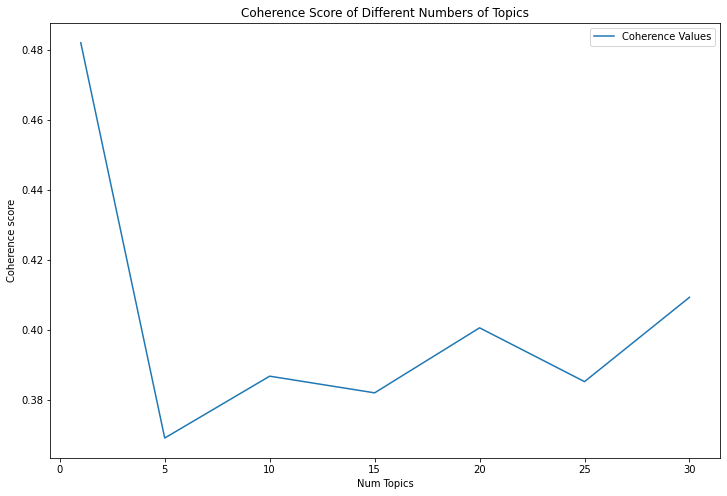

In [ ]:
x=[1,5,10,15,20,25,30]
coherence_values=[ 0.48201655797562876,0.3691902773641223,0.3868436093021691,0.3820853245195202,0.40064239647388405,0.3852847844650688,0.4093553349895909]

plt.figure(figsize=(12,8))
plt.plot(x, coherence_values, label="Coherence Values")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.title("Coherence Score of Different Numbers of Topics")
plt.show()

##Determine paramters alpha and beta

In [ ]:
# number of topics
num_topics =1
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.052*"flashbots" + 0.023*"mev" + 0.008*"mist" + 0.008*"eth" + '
  '0.007*"ethereum" + 0.005*"new" + 0.005*"us" + 0.004*"mistx" + 0.004*"help" '
  '+ 0.004*"support"')]


In [ ]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48201655797562876


In [ ]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.026198  0.004393       1        1  15.814726
9      0.007934  0.017719       2        1  10.162733
12     0.000057 -0.001071       3        1   6.978340
0     -0.000088 -0.002885       4        1   6.386992
14     0.001518 -0.000495       5        1   6.235291
1      0.002071 -0.002840       6        1   6.192060
8     -0.003021 -0.001046       7        1   5.841846
4      0.000180 -0.000567       8        1   5.718165
6      0.001258 -0.001166       9        1   5.697691
11     0.004238 -0.002095      10        1   5.316282
16     0.002211  0.001239      11        1   3.760471
13     0.000205 -0.000332      12        1   3.759370
5     -0.000565 -0.000700      13        1   3.396991
17     0.000705 -0.001468      14        1   3.375150
2      0.000555 -0.001707      15        1   2.972671
19     0.001756 -0.000622      16        1   2.570868
18     0.001141 -0.001270      17        1   2.206246
3      0.001876 -0.001416      18        1   2.076653
7      0.002199 -0.001945      19        1   0.868530
10     0.001967 -0.001726      20        1   0.668924, topic_info=          Term       Freq      Total Category  logprob  loglift
176         gt   2.000000   2.000000  Default  30.0000  30.0000
336   crucible   6.000000   6.000000  Default  29.0000  29.0000
119        eth   5.000000   5.000000  Default  28.0000  28.0000
256      mistx   7.000000   7.000000  Default  27.0000  27.0000
30         mev  12.000000  12.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
147       team   0.026368   2.993863  Topic20  -6.9241   0.2751
944       week   0.026368   3.204338  Topic20  -6.9241   0.2072
261     crypto   0.026368   3.301326  Topic20  -6.9241   0.1773
1    flashbots   0.044530  33.855915  Topic20  -6.4001  -1.6265
30         mev   0.026368  12.116765  Topic20  -6.9241  -1.1229

[928 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
440       1  0.458565           added
486       2  0.477642        adoption
251       1  0.450770       alchemist
1026      1  0.372929   alchemistcoin
506       1  0.405219  alchemistradio
...     ...       ...             ...
38        1  0.407022             via
77        3  0.386916           video
688       2  0.385397             way
944       2  0.312077            week
1245      1  0.375011             yes

[125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 10, 13, 1, 15, 2, 9, 5, 7, 12, 17, 14, 6, 18, 3, 20, 19, 4, 8, 11])

In [ ]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.3,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.008*"flashbots" + 0.002*"transactions" + 0.002*"nft" + 0.002*"mev" + '
  '0.001*"private" + 0.001*"mint" + 0.001*"team" + 0.001*"bloxroutelabs" + '
  '0.001*"ethereum" + 0.001*"nfts"'),
 (1,
  '0.008*"flashbots" + 0.002*"mev" + 0.001*"gas" + 0.001*"ethereum" + '
  '0.001*"defi" + 0.001*"eth" + 0.001*"rpc" + 0.001*"miners" + 0.001*"mist" + '
  '0.001*"time"'),
 (2,
  '0.009*"flashbots" + 0.004*"mev" + 0.002*"mistx" + 0.002*"dex" + '
  '0.002*"mist" + 0.002*"ethereum" + 0.001*"team" + 0.001*"using" + '
  '0.001*"transactions" + 0.001*"alchemist"'),
 (3,
  '0.012*"mev" + 0.011*"flashbots" + 0.002*"ethereum" + 0.002*"boost" + '
  '0.002*"mist" + 0.001*"value" + 0.001*"eth" + 0.001*"extractable" + '
  '0.001*"smartcontracts" + 0.001*"miners"'),
 (4,
  '0.014*"flashbots" + 0.004*"mev" + 0.002*"mist" + 0.002*"thegostep" + '
  '0.001*"mistx" + 0.001*"gas" + 0.001*"defi" + 0.001*"ethereum" + '
  '0.001*"copper" + 0.001*"eth"'),
 (5,
  '0.016*"flashbots" + 0.008*"mist" + 0.007*"mev" + 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4015958972335351


In [ ]:
from pprint import pprint

# number of topics
num_topics =1
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.052*"flashbots" + 0.023*"mev" + 0.008*"mist" + 0.008*"eth" + '
  '0.007*"ethereum" + 0.005*"new" + 0.005*"us" + 0.004*"mistx" + 0.004*"help" '
  '+ 0.004*"support"')]


In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.400071348258349


##Network

The words in cleaned tweets are paired up by their co-occurrence across the tweets. A counter is defined to capture the top 50 co-occurrence frequency. We choose Python package NetworkX for visualizing this weighted graph. Each node represents a word, each edge represents a connection between words co-occurrence,  and the thickness of edges depicts is absolute frequency of the occurrence of word-word pair. 


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [ ]:
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens
def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
df_mev2

Date  \
0     2022-09-30 20:48:24+00:00   
1     2022-09-30 20:47:32+00:00   
2     2022-09-30 20:46:41+00:00   
3     2022-09-30 18:02:14+00:00   
4     2022-09-30 17:20:42+00:00   
...                         ...   
21233 2019-01-01 16:45:06+00:00   
21234 2019-01-01 12:40:05+00:00   
21235 2019-01-01 10:15:09+00:00   
21236 2019-01-01 09:15:05+00:00   
21237 2019-01-01 09:00:04+00:00   

                                                  Tweets  \
0      🚨🚨🚨 Keep an eye on this #SandwichAttacker!😈😈😈\...   
1      🚨🚨🚨 Keep an eye on this #SandwichAttacker!😈😈😈\...   
2      🚨🚨🚨 Keep an eye on this #SandwichAttacker!😈😈😈\...   
3      🔴 Visita el #MEV aquest cap de setmana i aprof...   
4      #MEV 🤖 Our user made a profit of $79,441 with ...   
...                                                  ...   
21233  The ESP Ecocent MEV System is simply explained...   
21234  The ESP Ecocent MEV System is simply explained...   
21235  4 new flats were constructed @arnosarms owned ...   
21236  The ESP Ecocent MEV System is simply explained...   
21237  Achieve a compliant &amp; better SAP rating wi...   

                                    paper_text_processed  len         day  \
0      🚨🚨🚨 keep an eye on this #sandwichattacker😈😈😈\n...   27  2022-09-30   
1      🚨🚨🚨 keep an eye on this #sandwichattacker😈😈😈\n...   27  2022-09-30   
2      🚨🚨🚨 keep an eye on this #sandwichattacker😈😈😈\n...   27  2022-09-30   
3      🔴 visita el #mev aquest cap de setmana i aprof...   39  2022-09-30   
4      #mev 🤖 our user made a profit of $79441 with a...   28  2022-09-30   
...                                                  ...  ...         ...   
21233  the esp ecocent mev system is simply explained...   21  2019-01-01   
21234  the esp ecocent mev system is simply explained...   21  2019-01-01   
21235  4 new flats were constructed @arnosarms owned ...   33  2019-01-01   
21236  the esp ecocent mev system is simply explained...   21  2019-01-01   
21237  achieve a compliant &amp; better sap rating wi...   17  2019-01-01   

                                 tweet_without_stopwords  
0      🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...  
1      🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...  
2      🚨🚨🚨 keep eye #sandwichattacker😈😈😈 #mev contrac...  
3      🔴 visita el #mev aquest cap setmana aprofita l...  
4      #mev 🤖 user made profit $79441 roi 44838% 7 da...  
...                                                  ...  
21233  esp ecocent mev system simply explained video:...  
21234  esp ecocent mev system simply explained video:...  
21235  4 new flat constructed @arnosarms owned @eatdr...  
21236  esp ecocent mev system simply explained video:...  
21237  achieve compliant better sap rating ecocent #m...  

[21238 rows x 6 columns]

In [ ]:
tweets_no_urls = [remove_url(tweet) for tweet in df_mev2.paper_text_processed]
# Create list of lists containing bigrams in tweets
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ["marquem","m脕ximo","abaixo","colem","u","e","#stopasianhate聽","poss脥veis",'馃槩',"&amp;","脕","脥","鈥檛","鈥檙", "鈥檚",'from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"]
lemmatizer=WordNetLemmatizer()
tweets_nsw_nc = [[lemmatizer.lemmatize(w) for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df_mev = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df_mev

bigram  count
0            (#arbitrage, using)   7332
1                     (using, ()   6615
2              (#mev, #hotwater)   4452
3                     (#mev, 🤖️)   4439
4                     (🤖️, made)   4412
5                  (mev, system)   4350
6                 (ecocent, mev)   4349
7               (system, simply)   4349
8            (simply, explained)   4349
9                      (#mev, 🤖)   3089
10                (esp, ecocent)   2749
11                     (🤖, made)   2705
12            (explained, video)   2554
13                   (video, go)   2554
14                    (go, info)   2554
15                  (info, view)   2554
16                   (view, it:)   2554
17                   (it:, #mev)   2554
18                   ($weth, ):)   2327
19      (triangular, #arbitrage)   2106
20        (sandwich, #arbitrage)   1945
21           (explained, video:)   1795
22                    ((, $usdc)   1620
23                   ($wbnb, ):)   1586
24         (spatial, #arbitrage)   1580
25                ($usdc, $weth)   1475
26                  (video:, go)   1341
27                   (go, info:)   1341
28                 (info:, #mev)   1341
29                    ((, $weth)   1200
30                (made, profit)   1100
31                    (token, ()   1085
32                      (7, day)   1084
33                    (day, via)   1040
34              (#mev, contract)   1017
35              (contract, made)   1016
36                   (keep, eye)   1010
37  (#sandwichattacker😈😈😈, #mev)   1009
38   (eye, #sandwichattacker😈😈😈)   1006
39                   (🚨🚨🚨, keep)   1004
40                ($usdt, $wbnb)    884
41                    ((, $usdt)    858
42                ($weth, $usdt)    834
43                    (sap, pas)    807
44                      (4, new)    705
45                   (new, flat)    705
46           (flat, constructed)    705
47     (constructed, @arnosarms)    705
48           (@arnosarms, owned)    705
49          (owned, @eatdrinkmb)    705

In [ ]:
bigram_df_mev.to_csv("mev_network.csv")

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df_mev.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/1000)
G.remove_nodes_from(["pfv", "tag"])

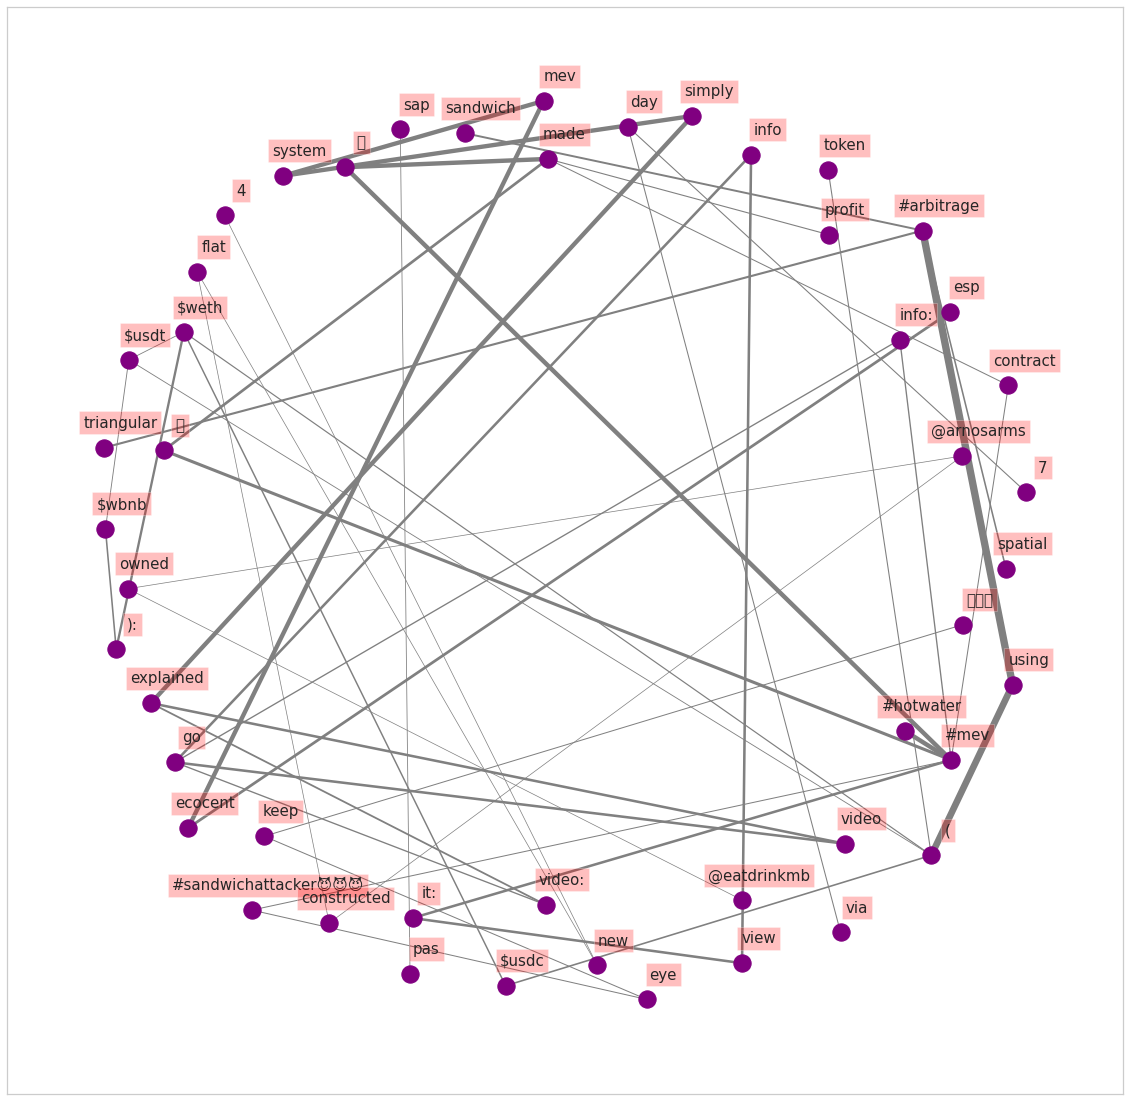

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=9,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15)
    
plt.show()